# Inference: Adaptive Covariance: localised MCMC

This example shows you how to perform Bayesian inference on a time series, using a variant of [Adaptive Covariance MCMC](http://pints.readthedocs.io/en/latest/mcmc_samplers/adaptive_covariance_mcmc_remi.html) detailed in Algorithm 7 of [1], which involves using a vector of possible proposal distributions.

[1] A tutorial on adaptive MCMC
    Christophe Andrieu and Johannes Thoms, Statistical Computing,
    2008, 18: 343-373

It follows on from the [first sampling example](./sampling-first-example.ipynb).

In [7]:
import os
os.chdir('C:/Users/bclamber/Desktop/AllPints/pints4/pints')
from __future__ import print_function
import pints
import pints.toy as toy
import pints.plot
import numpy as np
import matplotlib.pyplot as plt

# Load a forward model
model = toy.LogisticModel()

# Create some toy data
real_parameters = [0.015, 500]
times = np.linspace(0, 1000, 1000)
org_values = model.simulate(real_parameters, times)

# Add noise
noise = 10
values = org_values + np.random.normal(0, noise, org_values.shape)
real_parameters = np.array(real_parameters + [noise])

# Get properties of the noise sample
noise_sample_mean = np.mean(values - org_values)
noise_sample_std = np.std(values - org_values)

# Create an object with links to the model and time series
problem = pints.SingleOutputProblem(model, times, values)

# Create a log-likelihood function (adds an extra parameter!)
log_likelihood = pints.UnknownNoiseLogLikelihood(problem)

# Create a uniform prior over both the parameters and the new noise variable
log_prior = pints.UniformLogPrior(
    [0.01, 400, noise*0.1],
    [0.02, 600, noise*100]
)

# Create a posterior log-likelihood (log(likelihood * prior))
log_posterior = pints.LogPosterior(log_likelihood, log_prior)

# Choose starting points for 3 mcmc chains
xs = [
    real_parameters * 0.9,
]

# Create mcmc routine with four chains
mcmc = pints.MCMCSampling(log_posterior, 1, xs, method=pints.AdaptiveCovarianceLocalisedMCMC)

# Add stopping criterion
mcmc.set_max_iterations(8000)

# Start adapting after 1000 iterations
mcmc.set_initial_phase_iterations(1000)

# Disable logging mode
mcmc.set_log_to_screen(False)

# Run!
print('Running...')
chains = mcmc.run()
print('Done!')

# Show traces and histograms
pints.plot.trace(chains)

# Discard warm up
chains = chains[:, 2000:, :]

Running...


C:\Users\bclamber\Desktop\AllPints\pints4\pints\pints\_mcmc\_adaptive_covariance.py:162: RuntimeWarning: overflow encountered in exp
  self._alpha = np.minimum(1, np.exp(r))


Done!


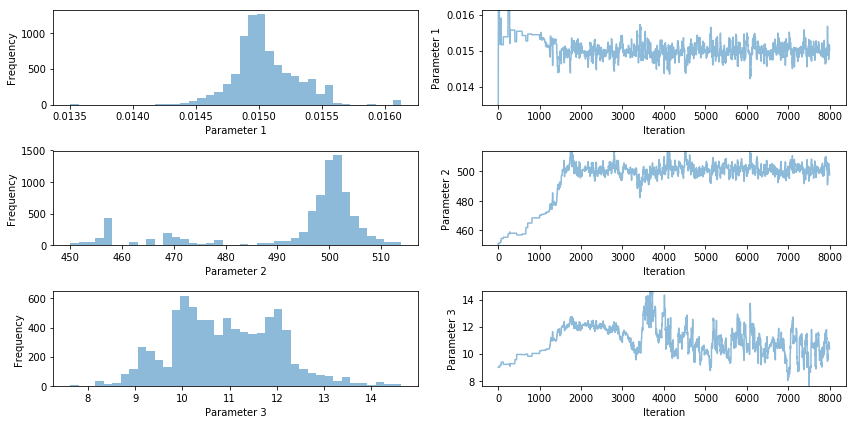

In [8]:
plt.hist(np.vstack(chains)[:,0])
plt.show()